In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import visfunctions as sp
import utilfunctions as sf
import pickle
from collections import Counter
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def visualize_attention(CC_data, plotN=5, plottype=2, SIGMA=50, resize=None):
    # plottype:
    # 1 for gaze locations only
    # 2 for heatmap overlay
    # 3 for regular spotlight
    # 4 for spotlight with level sets
    # SIGMA is used for converting locations into maps (distributions)
    # plotN is how many images to plot

    imnames = list(CC_data.keys())
    
    if plotN:
        imnames = imnames[:plotN] 

    for filename in imnames:

        code_heatmap,im = sf.get_heatmap_for_image(filename,CC_data[filename],imdir,sigma=SIGMA,toplot=False, resize=resize)

        fig, ax = plt.subplots(1, 1, figsize=(8,8))

        if plottype==1:
            ax.imshow(im)
            xs = [elem['coords'][0] for elem in CC_data[imnames[i]]]
            ys = [elem['coords'][1] for elem in CC_data[imnames[i]]]
            ax.scatter(x=xs, y=ys, c='r', s=10)
        elif plottype==2:
            sp.transparent_heatmap(ax,im,code_heatmap)
        elif plottype==3:
            spotlight_res = sp.spotlight(im,code_heatmap);
            ax.imshow(spotlight_res); 
        elif plottype==4:
            spotlight_res = sp.spotlight_custom(im,code_heatmap,toplot=False,percentile_based=False,\
                                                levels=5,most_salient_nlevel=3,smoothness=0)
            ax.imshow(spotlight_res); 

        ax.set_axis_off(); ax.set_title(filename);

        plt.show();
        
def print_number_viewers(bubble_data):
    imnames = list(bubble_data.keys())
    for filename in imnames:
        num_users = len(set([data['user'] for data in bubble_data[filename]]))
    print('Avg. # viewers/image: %2.1f'%(np.mean(num_users)))

def convert_bubble_data(data):
    res = {}
    for row in data.iterrows():
        res[row[1][1]] = res.get(row[1][1], [])
        #res[row[1][1]].append({'coords': (int(row[1][3]/2.25),int(row[1][4]/2.25)), 'user': row[1][2], 'timestamp': row[1][0]})
        res[row[1][1]].append({'coords': (int(row[1][3]),int(row[1][4])), 'user': row[1][2], 'timestamp': row[1][0]})
        #res[row[1][1]].append({'coords': (int(row[1][4]*2.25),int(row[1][3]*2.25)), 'user': row[1][2], 'timestamp': row[1][0]})
    return res

# CAT2000: natural images #
* Source: http://saliency.mit.edu/datasets.html
* This data was collected with images resized to 853x480 in the browser

In [3]:
with open('BubbleView_CAT2000.pickle', 'rb') as curfile:
    raw_data = pickle.load(curfile)
bubble_data = convert_bubble_data(raw_data)

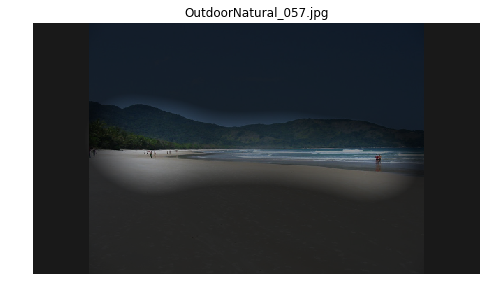

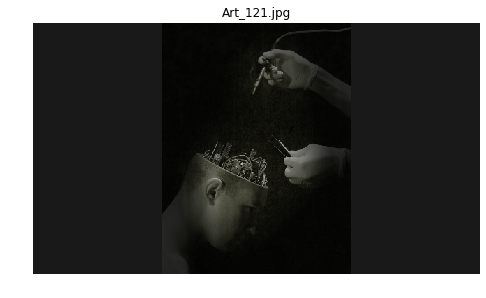

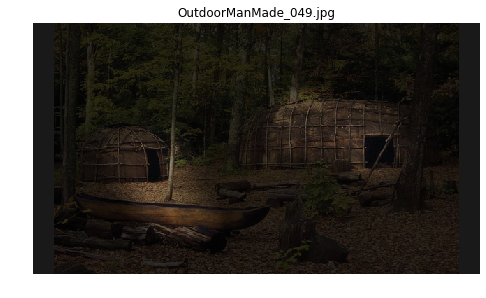

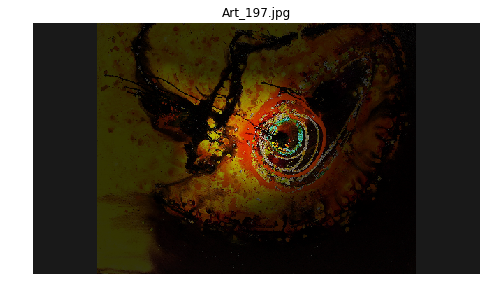

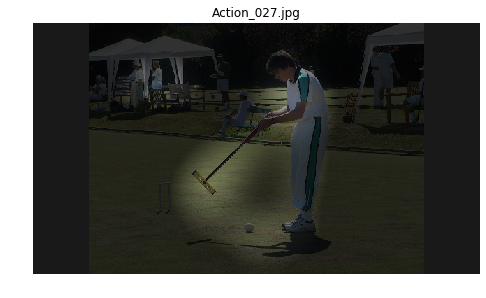

In [4]:
RESIZE = (640,480)
imdir = '../../attention-methodologies/data/CodeCharts/CAT2000_images'# CHANGE THIS 
# by downloading the images from here: http://attent-methods.scripts.mit.edu/datasets/CAT2000_images.zip
visualize_attention(bubble_data, plotN=5, plottype=3, resize= RESIZE)

In [5]:
print_number_viewers(bubble_data)

Avg. # viewers/image: 12.0
